<a href="https://colab.research.google.com/github/Sottix99/SMOS_Final_Project/blob/main/ESS8Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the dataset

In [1]:
%%capture
import numpy as np
import pandas as pd 
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import csv
import os
import missingno as msno
from collections import Counter
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
from collections import defaultdict
import statistics
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn import preprocessing
import plotly.express as px
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv(r'/content/drive/MyDrive/SMOS/ESS8e02_2.csv',low_memory=False)

In [4]:
df.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,inwmms,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm
0,ESS8e02_2,8,2.2,10.12.2020,1,AT,0.611677,1.178495,0.370393,0.436506,...,12,2016,7,37,5,12,2016,8,33,50.0
1,ESS8e02_2,8,2.2,10.12.2020,2,AT,1.223354,0.899471,0.370393,0.333158,...,11,2016,9,39,25,11,2016,11,10,86.0
2,ESS8e02_2,8,2.2,10.12.2020,4,AT,0.389058,0.315753,0.370393,0.116953,...,11,2016,17,17,22,11,2016,18,0,38.0
3,ESS8e02_2,8,2.2,10.12.2020,6,AT,0.642594,0.472467,0.370393,0.174999,...,10,2016,19,9,11,10,2016,19,59,46.0
4,ESS8e02_2,8,2.2,10.12.2020,10,AT,3.432402,2.246706,0.370393,0.832164,...,12,2016,10,31,1,12,2016,11,49,70.0


In the ESS8 data there are 535 columns, we want to use only few of them, in particular:

* `wrclmch`: How worried about climate change? {1	Not at all worried,
2	Not very worried,
3	Somewhat worried,
4	Very worried,
5	Extremely worried,
6	Not applicable,
7	Refusal,
8	Don't know,
9	No answer*}


* `clmchng` : Do you think world's climate is changing? {1	Definitely changing,
2	Probably changing,
3	Probably not changing,
4	Definitely not changing,
7	Refusal,
8	Don't know,
9	No answer}

* `impenv` : Important to care for nature and environment {1	Very much like me,
2	Like me,
3	Somewhat like me,
4	A little like me,
5	Not like me,
6	Not like me at all,
7	Refusal,
8	Don't know,
9	No answer*}

* `ccgdbd` : Climate change good or bad impact across world {0	Extremely bad,
1,	
2	,
3	,
4	,
5	,
6	,
7	,
8	,
9	,
10	Extremely good,
66	Not applicable
77	Refusal
88	Don't know
99	No answer}


* `ccnthum` : Climate change caused by natural processes, human activity, or both? {
1	Entirely by natural processes,
2	Mainly by natural processes,
3	About equally by natural processes and human activity,
4	Mainly by human activity,
5	Entirely by human activity,
55	I don't think climate change is happening,
66	Not applicable,
77	Refusal,
88	Don't know,
99	No answer}


* `lrscale` : In politics people sometimes talk of 'left' and 'right'. Using this card, where would you place yourself on this scale, where 0 means the left and 10 means the right? {0:	Left,
	1,
	2,
	3,
	4,
	5,
6,
	7,
	8,
	9,
10:	Right,
77	Refusal,
88	Don't know,
99	No answer}


* `eisced`: Highest level of education, ES - ISCED {
0	Not possible to harmonise into ES-ISCED,
1	ES-ISCED I , less than lower secondary,
2	ES-ISCED II, lower secondary,
3	ES-ISCED IIIb, lower tier upper secondary,
4	ES-ISCED IIIa, upper tier upper secondary,
5	ES-ISCED IV, advanced vocational, sub-degree,
6	ES-ISCED V1, lower tertiary education, BA level,
7	ES-ISCED V2, higher tertiary education, >= MA level,
55	Other,
77	Refusal,
88	Don't know,
99	No answer}


* `agea` : Age of respondent , calculated


* `gndr` : Gender {1	Male,
2	Female,
9	No answer}


* `hinctnta` : Household's total net income, all sources {1	J - 1st decile,
2	R - 2nd decile,
3	C - 3rd decile,
4	M - 4th decile,
5	F - 5th decile,
6	S - 6th decile,
7	K - 7th decile,
8	P - 8th decile,
9	D - 9th decile,
10	H - 10th decile,
77	Refusal,
88	Don't know,
99	No answer}


* `cntry` : Country {AT	Austria,
BE	Belgium,
BG	Bulgaria,
CH	Switzerland,
CY	Cyprus,
CZ	Czechia,
DE	Germany,
DK	Denmark,
EE	Estonia,
ES	Spain,
FI	Finland,
FR	France,
GB	United Kingdom,
HR	Croatia,
HU	Hungary,
IE	Ireland,
IS	Iceland,
IT	Italy,
LT	Lithuania,
LV	Latvia,
ME	Montenegro,
NL	Netherlands,
NO	Norway,
PL	Poland,
PT	Portugal,
RS	Serbia,
SE	Sweden,
SI	Slovenia,
SK	Slovakia}

* `inctxff` : Favour increase taxes on fossil fuels to reduce climate change {1	Strongly in favour,
2	Somewhat in favour,
3	Neither in favour nor against,
4	Somewhat against,
5	Strongly against,
7	Refusal,
8	Don't know,
9	No answer}


* `rdcenr` : How often do things to reduce energy use {1	Never,
2	Hardly ever,
3	Sometimes,
4	Often,
5	Very often,
6	Always,
55	Cannot reduce energy use,
77	Refusal,
88	Don't know,
99	No answer}


* `anweight` : The Analysis weight computed directly from the European Social Survey

# Features Engeneering

In [147]:
Selected_columns=['anweight','cntry','hinctnta', 'gndr', 'agea','inctxff','rdcenr','eisced','lrscale','ccnthum','clmchng','impenv','ccgdbd','wrclmch']

In [148]:
d=df[Selected_columns]

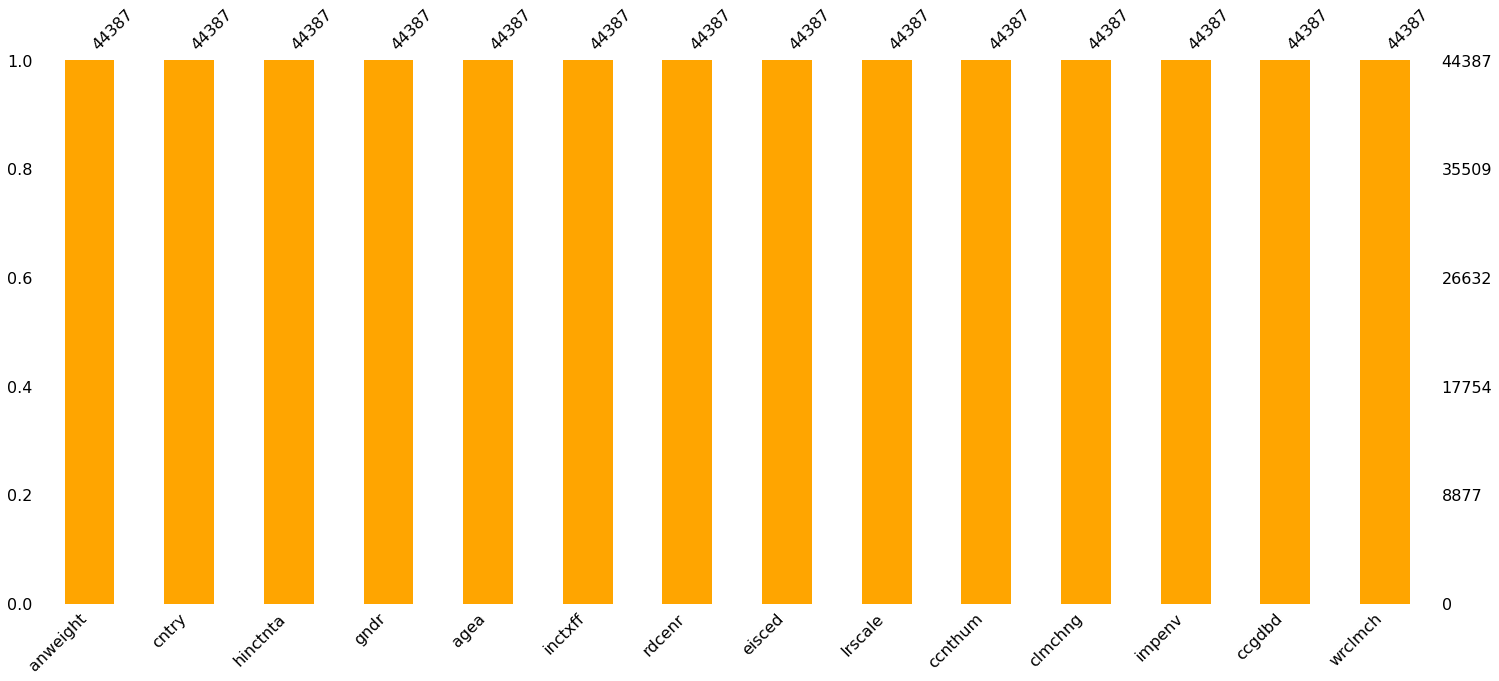

In [149]:
msno.bar(d, color='orange')

In [150]:
d.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [151]:
d.cntry.value_counts()

DE    2852
IE    2757
IT    2626
IL    2557
RU    2430
CZ    2269
LT    2122
FR    2070
EE    2019
AT    2010
GB    1959
ES    1958
FI    1925
BE    1766
PL    1694
NL    1681
HU    1614
SE    1551
NO    1545
CH    1525
SI    1307
PT    1270
IS     880
Name: cntry, dtype: int64

In [152]:
d.hinctnta.value_counts()

77    4990
3     4136
2     4021
4     4017
5     3958
7     3918
6     3851
8     3686
1     3678
88    2902
9     2684
10    2496
99      50
Name: hinctnta, dtype: int64

In [153]:
d.hinctnta.median()

6.0

In [154]:
d.gndr.value_counts()

2    23351
1    21027
9        9
Name: gndr, dtype: int64

In [155]:
d.agea.value_counts()

60     821
51     820
59     806
65     794
52     793
      ... 
96       5
99       3
98       3
97       3
100      1
Name: agea, Length: 87, dtype: int64

In [156]:
d.eisced.value_counts()

4     8720
2     7388
3     7153
5     6275
7     6013
6     4760
1     3861
55      88
77      82
88      39
99       8
Name: eisced, dtype: int64

In [157]:
d.lrscale.value_counts()

5     12389
88     4305
7      4269
6      4105
4      3780
3      3754
8      3265
2      2121
10     1592
77     1487
0      1463
9       999
1       846
99       12
Name: lrscale, dtype: int64

In [158]:
d.wrclmch.value_counts()

3    19729
4     9649
2     8493
1     2590
5     2193
6     1317
8      364
7       29
9       23
Name: wrclmch, dtype: int64

In [159]:
d.inctxff.value_counts()

4    10766
2    10559
3     9714
5     8034
1     3328
8     1870
7      112
9        4
Name: inctxff, dtype: int64

In [160]:
d.rdcenr.value_counts()

4     13186
5     10920
3      9764
6      6598
2      2337
1      1031
88      285
55      233
77       24
99        9
Name: rdcenr, dtype: int64

In [161]:
d.anweight.value_counts()

0.123189    178
0.143850    172
0.117111    170
0.065006    130
0.090705    123
           ... 
2.011126      1
1.913886      1
2.074527      1
1.706736      1
0.134491      1
Name: anweight, Length: 15811, dtype: int64

In [162]:
d.clmchng.value_counts()

1    24585
2    15764
3     1962
8     1057
4      978
7       38
9        3
Name: clmchng, dtype: int64

In [163]:
d.impenv.value_counts()

2    17116
1    12637
3     9012
4     3538
5     1107
8      337
7      231
6      218
9      191
Name: impenv, dtype: int64

In [164]:
d.ccgdbd.value_counts()

3     7884
2     6847
5     6600
0     5459
4     5184
1     3606
6     2183
7     1810
88    1769
66    1317
8     1094
10     305
9      260
77      50
99      19
Name: ccgdbd, dtype: int64

# Clean the dataset

In [165]:
from sklearn.preprocessing import Normalizer, StandardScaler

In [166]:
cleanup = {"hinctnta":     {77: np.nan ,88: np.nan, 99: np.nan},
           "lrscale":      {77: np.nan ,88: np.nan, 99: np.nan},
           #1.0:0, 2.0:0, 3.0:1, 4.0:1, 5.0:1
           "ccnthum":      {1.0:1, 2.0:1, 3.0:2, 4.0:2, 5.0:2,66:np.nan, 77: np.nan ,88: np.nan, 99: np.nan, 55:np.nan},
           "eisced":       {77: np.nan ,88: np.nan, 99: np.nan, 55:np.nan},
           "gndr":       {2: 0, 9:np.nan},
           #"cntry": {'BG':1, 'FR': 2, 'CZ':3, 'FI': 4, 'EE':5, 'HU': 6, 'LT':7, 'HR': 8, 'SI':9, 'SK': 10 },
           "wrclmch": {1:0,2:0,3:1,4:1,5:1, 6: np.nan ,7: np.nan, 8: np.nan, 9:np.nan},
           "rdcenr": {1:0,2:0,3:0,4:1,5:1,6:1,55: np.nan ,77: np.nan ,88: np.nan, 99: np.nan},
           "inctxff": {1:1,2:1,3:2,4:0,5:0,7: np.nan ,8: np.nan, 9: np.nan},
           "clmchng": {1:1,2:1,3:0,4:0,7: np.nan ,8: np.nan, 9: np.nan},
           "impenv": {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7: np.nan ,8: np.nan, 9: np.nan},
           "ccgdbd": {66: np.nan ,77: np.nan ,88: np.nan, 99: np.nan}
           }

In [167]:
d = d.replace(cleanup)

In [168]:
d.dropna(inplace=True)

In [169]:
d['wrclmch'] = d['wrclmch'].astype(int)
d['ccnthum'] = d['ccnthum'].astype(int)

In [170]:
d.ccnthum.value_counts() # 1 natural reason, 2 human

2    27080
1     2428
Name: ccnthum, dtype: int64

In [171]:
d.wrclmch.value_counts() # 1 not worried , 0 worried

1    22701
0     6807
Name: wrclmch, dtype: int64

In [172]:
d['cntry']= d['cntry'].astype('category')

In [173]:
d['cntry'] = d['cntry'].map({'DE': 'W', 'IE': 'W', 'IT': 'S', 'IL': np.nan, 'RU': 'CE', 'CZ': 'CE', 'LT': 'CE', 'FR': 'W', 'EE': 'CE', 'AT': 'W', 
                                                'GB': 'W', 'ES': 'S', 'FI': 'N', 'BE': 'W', 'PL': 'CE', 'NL': 'W', 'HU': 'CE', 'SE': 'N', 'NO': 'N', 'CH': 'W',
                                                'SI': 'CE', 'PT': 'S', 'IS': 'N'})


In [174]:
d.dropna(inplace=True)

In [175]:
d.cntry = pd.Categorical(d.cntry)
d['cntry'] = d.cntry.cat.codes

In [176]:
cols_to_norm = ['hinctnta',  'agea',
       'eisced', 'lrscale','ccgdbd']

In [177]:
d[cols_to_norm]=StandardScaler().fit_transform(d[cols_to_norm])

In [178]:
d

,anweight,cntry,hinctnta,gndr,agea,inctxff,rdcenr,eisced,lrscale,ccnthum,clmchng,impenv,ccgdbd,wrclmch
1,0.333158,3,-0.166975,1.0,0.048614,1.0,1.0,-0.080630,-1.875307,2,1.0,1.0,-0.569963,1
2,0.116953,3,-1.275228,0.0,0.558469,0.0,1.0,-0.623000,-0.030193,2,1.0,1.0,-0.569963,1
3,0.174999,3,-0.536393,1.0,0.112346,2.0,1.0,-0.623000,-2.336586,2,1.0,2.0,1.759833,1
4,0.832164,3,-1.275228,0.0,-0.971095,2.0,1.0,-0.623000,-0.030193,2,1.0,1.0,0.827914,1
5,0.374608,3,1.680113,0.0,0.462871,0.0,1.0,-0.080630,-0.030193,2,1.0,1.0,0.827914,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44378,0.125447,0,-0.536393,1.0,0.494737,2.0,1.0,-0.623000,-0.030193,2,1.0,1.0,-0.569963,1
44379,0.101995,0,0.941278,1.0,-0.875498,0.0,1.0,-0.080630,-0.030193,2,1.0,1.0,0.827914,1
44382,0.112359,0,-0.536393,0.0,0.462871,2.0,1.0,-0.080630,-1.875307,2,1.0,1.0,0.827914,1
44384,0.115147,0,0.571860,1.0,0.399139,1.0,1.0,1.004111,-2.336586,2,1.0,1.0,-1.035923,1


In [179]:
d.columns = ['W', 'Region', 'Income', 'Gender','Age','Increase_fuel_taxes','Reduce_energy','Education', 'Politics', 'CC_reasons', 'CC_ishappening', 'Care_nature', 'CC_isgood','Y']


In [180]:
d.dropna(inplace=True)

# Exploratory Data Analysis

In [ ]:
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_red = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']

In [ ]:
h= pd.DataFrame(d['Y'].value_counts())
fig = px.pie(h,values='Y',names=['Not Worried','Worried'],hole=0.4,opacity=0.6,
            color_discrete_sequence=[colors_green[3],'darkred'],
             labels={'label':'Potability','Potability':'No. Of Samples'})
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Q. Are you worried about climate change?',x=0.47,y=0.98,
               font=dict(size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.show()

In [ ]:
from collections import Counter

In [ ]:
fig = px.histogram(d,x=d.Age,y=Counter(d['Age']),template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['green','red'],
                  barmode='group',histfunc='count')

fig.add_vline(x=5, line_width=1, line_color='black',line_dash='dot',opacity=0.7)

#fig.add_annotation(text='<5 NTU Turbidity is<br> considered safe',x=6,y=90,showarrow=False)


fig.show()

ValueError: ignored

In [ ]:
fig.update_layout(
    font_family='monospace',
    title=dict(text='Turbidity Distribution',x=0.5,y=0.95,
               font=dict(color='black',size=20)),
    xaxis_title_text='Turbidity (NTU)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor='black',borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)

In [ ]:
cor=d.drop('W',axis=1).corr()
fig = px.imshow(cor,height=800,width=800,color_continuous_scale='rdylgn',template='plotly_white')

fig.update_layout(font_family='monospace',
                title=dict(text='Correlation Heatmap',x=0.5,y=0.93,
                             font=dict(color='black',size=24)),
                coloraxis_colorbar=dict(len=0.85,x=1.1) 
                 )

fig.show()

# Modelling

In [137]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [181]:
train = d.sample(frac=0.8, random_state=25)
test = d.drop(train.index)

print(f"Number of training examples: {train.shape[0]}")
print(f"Number of testing examples: {test.shape[0]}")

Number of training examples: 22623
Number of testing examples: 5656


In [182]:
W=train.W

In [183]:
train.drop('W', inplace=True, axis=1)
test.drop('W', inplace=True, axis=1)

In [184]:
x_train = train[train.columns[0:len(train.columns)-1]]
y_train = train[train.columns[-1]]


x_test = test[test.columns[0:len(test.columns)-1]]
y_test = test[test.columns[-1]]


X = d[d.columns[1:len(d.columns)-1]]
Y=d[d.columns[-1]]

## Logistic regression


### From Statsmodels

#### Without weight

In [ ]:
formula = " Y ~ C(Region) + Income + C(Gender) + Age + Increase_fuel_taxes + Reduce_energy + Education + Politics + C(CC_reasons) + CC_ishappening + C(Care_nature) + CC_isgood"
log_reg = smf.glm(formula, data=train,family=sm.families.Binomial()).fit()

In [ ]:
print(log_reg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                23606
Model:                            GLM   Df Residuals:                    23589
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11849.
Date:                Mon, 05 Dec 2022   Deviance:                       23698.
Time:                        10:58:40   Pearson chi2:                 2.70e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.09

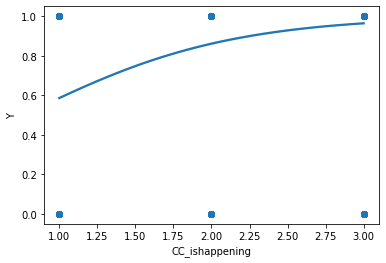

In [ ]:
sns.regplot(x='CC_ishappening', y='Y', data=d, logistic=True)

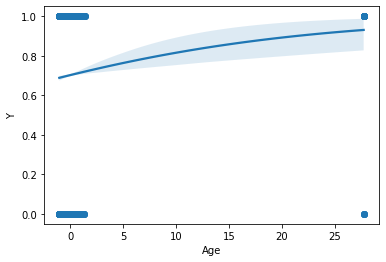

In [ ]:
sns.regplot(x='Age', y='Y', data=d, logistic=True)

#### With weight

In [185]:
formula1 = " Y ~ C(Region) + Income + C(Gender) + Age + C(Increase_fuel_taxes) + C(Reduce_energy) + Education + Politics + C(CC_reasons) + C(CC_ishappening) + C(Care_nature) + CC_isgood"
log_reg1 = smf.glm(formula1, data=train,family=sm.families.Binomial(),freq_weights= W ).fit()

In [186]:
print(log_reg1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                22623
Model:                            GLM   Df Residuals:                 24766.40
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10632.
Date:                Wed, 14 Dec 2022   Deviance:                       21265.
Time:                        10:13:14   Pearson chi2:                 2.34e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### From sklearn

In [77]:
# instantiate the model
lr = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
lr.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [78]:
predictions = lr.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.24      0.35      1330
           1       0.80      0.95      0.87      4326

    accuracy                           0.78      5656
   macro avg       0.70      0.60      0.61      5656
weighted avg       0.76      0.78      0.75      5656



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


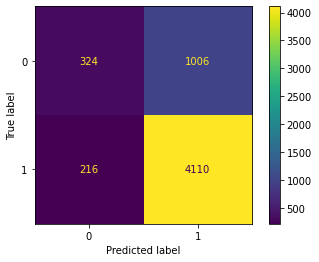

In [79]:
plot_confusion_matrix(lr, x_test, y_test)

In [80]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 78.843% (0.074%)


## Naive Bayes

In [ ]:
# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
predictions = gnb.predict(x_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.51      0.74      0.61      2073
           1       0.86      0.70      0.77      4792

    accuracy                           0.71      6865
   macro avg       0.69      0.72      0.69      6865
weighted avg       0.76      0.71      0.72      6865



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


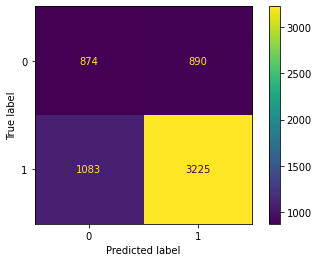

In [ ]:
plot_confusion_matrix(gnb, x_test, y_test)

In [ ]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 70.359% (0.568%)


## Logistic with smote

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE()
x_smote, y_smote = smt.fit_resample(x_train, y_train.ravel())

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before OverSampling, counts of label '1': 19302
Before OverSampling, counts of label '0': 8157 

After OverSampling, the shape of train_X: (38604, 12)
After OverSampling, the shape of train_y: (38604,) 

After OverSampling, counts of label '1': 19302
After OverSampling, counts of label '0': 19302


In [ ]:
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit( x_train_res, y_train_res)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
predictions = logreg.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60      2073
           1       0.86      0.67      0.75      4792

    accuracy                           0.70      6865
   macro avg       0.68      0.71      0.68      6865
weighted avg       0.75      0.70      0.71      6865



In [ ]:
plot_confusion_matrix(logreg, x_test, y_test)

NameError: ignored

## Naive Bayes with SMOTE

In [ ]:
gnb = GaussianNB()


# fit the model
gnb.fit(x_train_res, y_train_res)

GaussianNB()

In [ ]:
predictions = gnb.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.47      0.80      0.59      2073
           1       0.88      0.61      0.72      4792

    accuracy                           0.67      6865
   macro avg       0.67      0.71      0.66      6865
weighted avg       0.75      0.67      0.68      6865



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


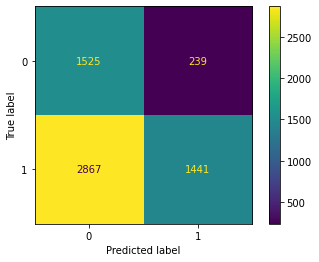

In [ ]:
plot_confusion_matrix(gnb, x_test, y_test)

In [ ]:
gnb.score(x_train_res, y_train_res)

0.5939012302489651

## Other models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1)

In [ ]:
predictions = knn.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.45      0.50      2073
           1       0.78      0.85      0.82      4792

    accuracy                           0.73      6865
   macro avg       0.68      0.65      0.66      6865
weighted avg       0.72      0.73      0.72      6865



In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.46      0.49      0.48      2073
           1       0.77      0.75      0.76      4792

    accuracy                           0.67      6865
   macro avg       0.62      0.62      0.62      6865
weighted avg       0.68      0.67      0.68      6865



In [ ]:


rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=30)

In [ ]:
predictions = rf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.43      0.52      2073
           1       0.79      0.91      0.85      4792

    accuracy                           0.77      6865
   macro avg       0.73      0.67      0.68      6865
weighted avg       0.75      0.77      0.75      6865



In [ ]:

svm=LinearSVC(C=0.0001)
svm.fit(x_train, y_train)

LinearSVC(C=0.0001)

In [ ]:
predictions = svm.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.26      0.39      2073
           1       0.75      0.96      0.84      4792

    accuracy                           0.75      6865
   macro avg       0.74      0.61      0.61      6865
weighted avg       0.74      0.75      0.70      6865



In [ ]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(x_train, y_train)
print("score on test: " + str(evc.score(x_test, y_test)))
print("score on train: "+ str(evc.score(x_train, y_train)))

score on test: 0.7586307356154406
score on train: 0.7672529953749226


In [ ]:
predictions = evc.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.37      0.48      2073
           1       0.77      0.93      0.84      4792

    accuracy                           0.76      6865
   macro avg       0.73      0.65      0.66      6865
weighted avg       0.75      0.76      0.73      6865



In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nns = MLPClassifier(hidden_layer_sizes=(20, 2), random_state=1,max_iter=100000)

In [ ]:
nns.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 2), max_iter=100000, random_state=1)

In [ ]:
predictions = nns.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56      1792
           1       0.80      0.88      0.84      4110

    accuracy                           0.76      5902
   macro avg       0.72      0.69      0.70      5902
weighted avg       0.75      0.76      0.75      5902

